In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Illustration of LOB shape function

In [6]:
L_example = lambda x : 0 if x <= 8 and x >=6 else x-8 if x > 8 else x - 6

In [11]:
xs = np.linspace(0, 15, 100)

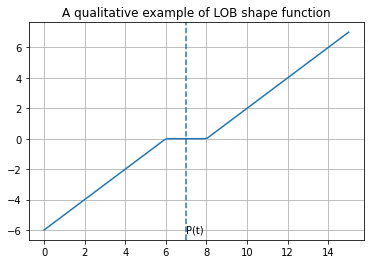

In [50]:
plt.plot(xs, np.array([L_example(x) for x in xs]))
plt.axvline(x=7, ls='--')
plt.annotate('P(t)', (7, -6.2))

plt.title("A qualitative example of LOB shape function")
plt.show()
plt.grid(True)

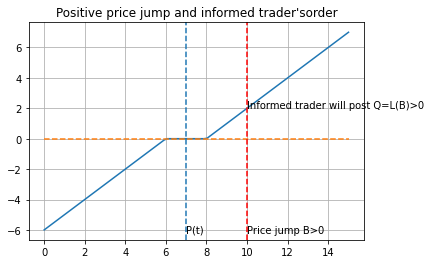

In [66]:
plt.plot(xs, np.array([L_example(x) for x in xs]))
plt.axvline(x=7, ls='--')
plt.annotate('P(t)', (7, -6.2))

plt.plot((0, 15), (0, 0), ls='--')

plt.axvline(x=10, ls='--', color = 'r')
plt.annotate('Price jump B>0', (10, -6.2))
plt.annotate('Informed trader will post Q=L(B)>0', (10, 2))

plt.title("Positive price jump and informed trader'sorder")
plt.show()
plt.grid(True)

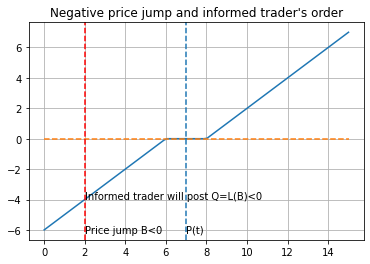

In [68]:
plt.plot(xs, np.array([L_example(x) for x in xs]))
plt.axvline(x=7, ls='--')
plt.annotate('P(t)', (7, -6.2))

plt.plot((0, 15), (0, 0), ls='--')

plt.axvline(x=2, ls='--', color = 'r')
plt.annotate('Price jump B<0', (2, -6.2))
plt.annotate('Informed trader will post Q=L(B)<0', (2, -4))

plt.title("Negative price jump and informed trader's order")
plt.show()
plt.grid(True)

# Numerical Examples

In [72]:
import scipy.stats as stats

In [71]:
r = 2/3
lambd = 2

In [161]:
def computeExpectation(x, sigma = 0.2):
    if x > 0:
        return 1/x*sigma/np.sqrt(2*np.pi)*np.exp(-x**2/2/sigma**2) + stats.norm.cdf(x, scale = sigma)
    if x < 0:
        return -1/x*sigma/np.sqrt(2*np.pi)*np.exp(-x**2/2/sigma**2) + 1 - stats.norm.cdf(x, scale = sigma)

## 1. Zero tick size

In [211]:
def cumulativeL(x, sigma = 0.2, r = 2/3):
    exp = computeExpectation(x, sigma = sigma)
    if x > 0:
        quantile = 1/(1-r) - r/(1-r)*exp
        return stats.norm.ppf(quantile)
    if x < 0:
        quantile = -r/(1-r) + r/(1-r)*exp
        return stats.norm.ppf(quantile)

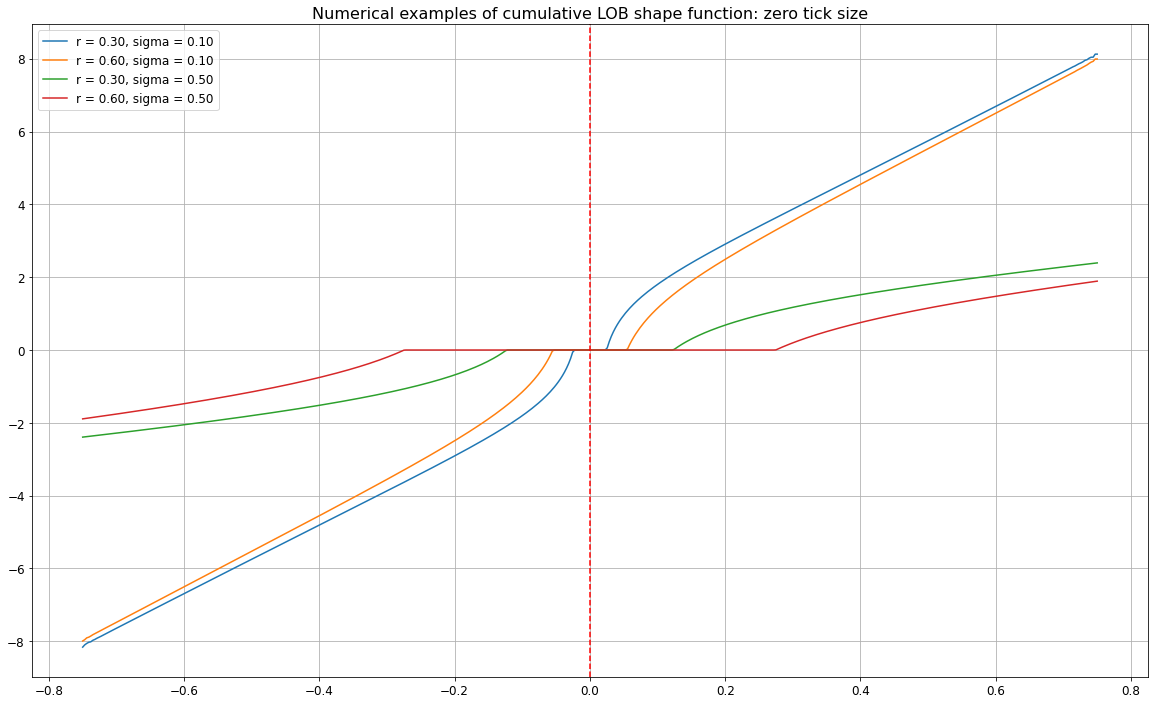

In [305]:
xx = np.linspace(-0.75, 0.75, 500)
sigs = [0.1, 0.5]
informedTraders = [0.3, 0.6]

df = pd.DataFrame(index = xx)
for sig in sigs:
    for r in informedTraders:
        vals = np.array([cumulativeL(x, sigma = sig, r = r) for x in xx])
        mask = xx*vals
        mask[np.isnan(mask)] = -1
        col_name = 'r = {:0.02f}, sigma = {:0.02f}'.format(r, sig)
        df[col_name] = vals
        df.loc[mask < 0, col_name] = 0

df.plot(fontsize = 12, figsize = (20, 12))
plt.grid()
plt.title('Numerical examples of cumulative LOB shape function: zero tick size', fontsize = 16)
plt.legend(fontsize = 12)
plt.axvline(0, ls='--', color = 'r')
plt.show()

## 2. Non-zero tick size

In [306]:
d = 0.0075
alpha = 0.01

In [321]:
NN = 30
x_pos = [d + (i-1)*alpha for i in np.arange(1, NN, 1)]
x_neg = [d + i * alpha for i in np.arange(-NN, -1, 1)]
x_all = x_neg + x_pos

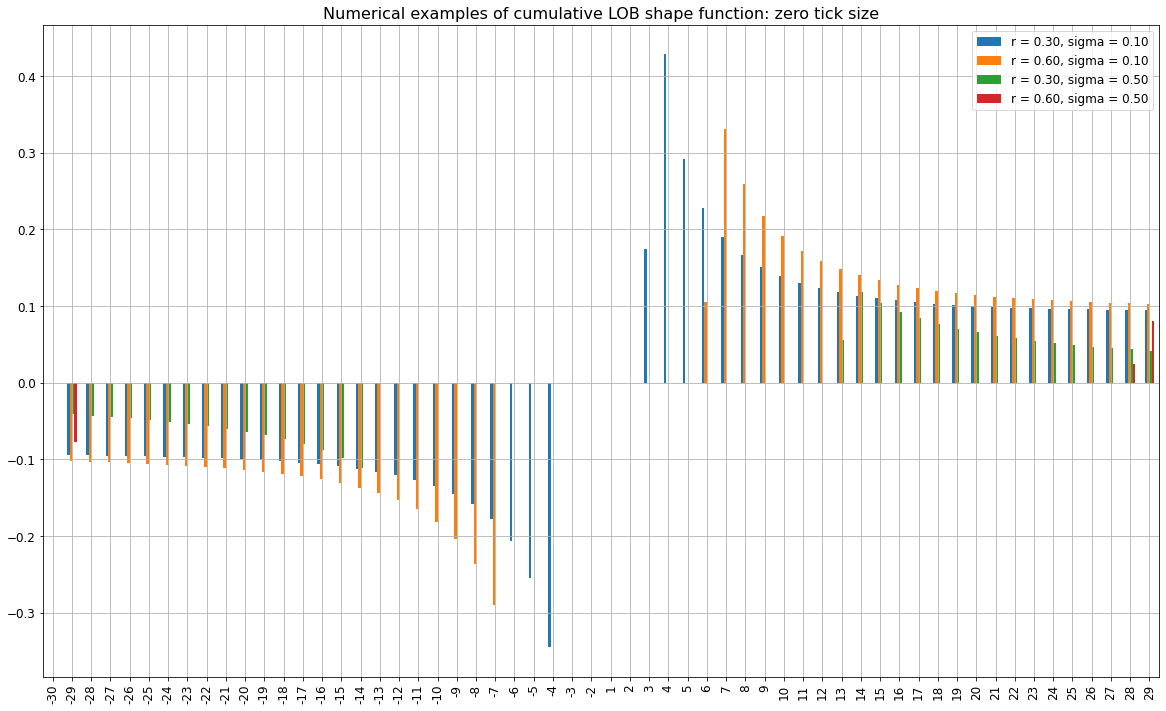

In [331]:
sigs = [0.1, 0.5]
informedTraders = [0.3, 0.6]

df = pd.DataFrame(index =  np.concatenate([np.arange(-NN, -1, 1), np.arange(1, NN, 1)]))
for sig in sigs:
    for r in informedTraders:
        vals = np.array([cumulativeL(x, sigma = sig, r = r) for x in x_all])
        mask = x_all*vals
        mask[np.isnan(mask)] = -1
        col_name = 'r = {:0.02f}, sigma = {:0.02f}'.format(r, sig)
        df[col_name] = vals
        df.loc[mask < 0, col_name] = 0
        df[col_name] = df[col_name].diff() * np.sign(df[col_name])

df.plot.bar(fontsize = 12, figsize = (20, 12))
plt.grid()
plt.title('Numerical examples of full limit order book: positive tick size={:0.02f}'.format(alpha), fontsize = 16)
plt.legend(fontsize = 12)

plt.show()